# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
single_data = study_results.merge(mouse_metadata)

# Display the data table for preview
single_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [61]:
# Checking the number of mice.
print(len(single_data['Mouse ID'].unique()))

249


In [62]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = single_data.loc[single_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse


array(['g989'], dtype=object)

In [63]:
# Optional: Get all the data for the duplicate mouse ID. 
display(single_data.loc[single_data['Mouse ID'] == duplicate_mouse[0]])


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [64]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = single_data[single_data['Mouse ID'] != duplicate_mouse[0]]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [65]:
# Checking the number of mice in the clean DataFrame.
print(len(cleaned_data['Mouse ID'].unique()))

248


## Summary Statistics

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_stats = single_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    np.mean,
    np.median,
    np.var,
    np.std,
    st.sem

])

regimen_stats = regimen_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})

regimen_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [67]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_stats = single_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])
regimen_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

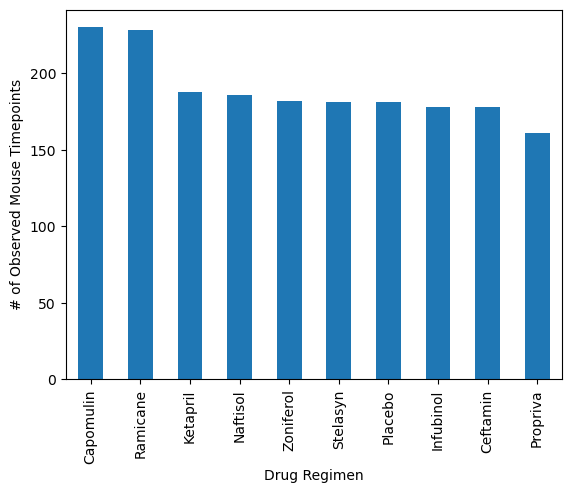

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = single_data['Drug Regimen'].value_counts()
counts.plot(kind='bar')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

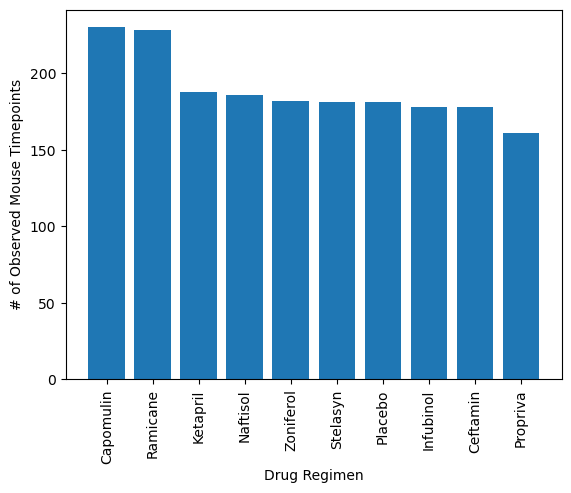

In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = single_data['Drug Regimen'].value_counts()

plt.bar(counts.index, counts.values)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xticks(rotation=90)

plt.show()

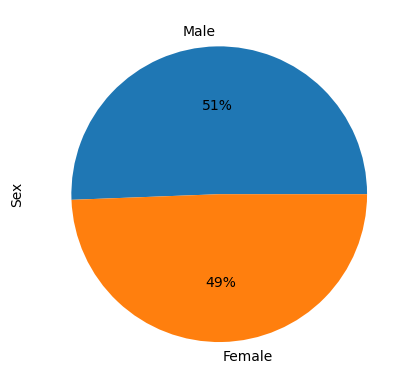

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = single_data['Sex'].value_counts()
counts.plot(kind='pie', autopct='%1.0f%%')

plt.show()

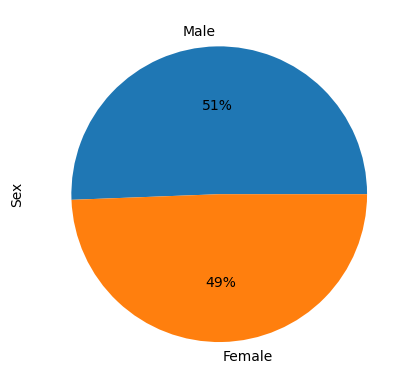

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = single_data['Sex'].value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.0f%%')
plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = single_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_volume = pd.merge(last_timepoint, single_data, on=['Mouse ID', 'Timepoint'])

In [73]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for treatment in treatments:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = last_tumor_volume.loc[last_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


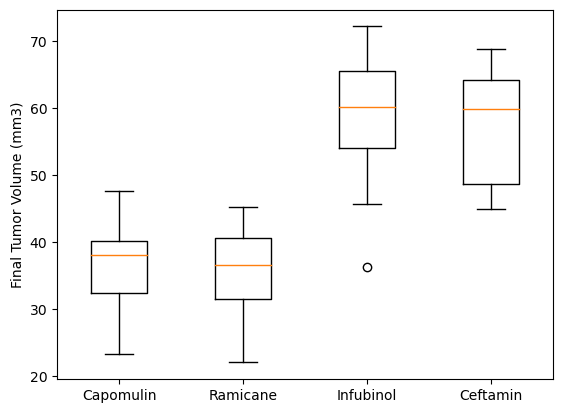

In [74]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

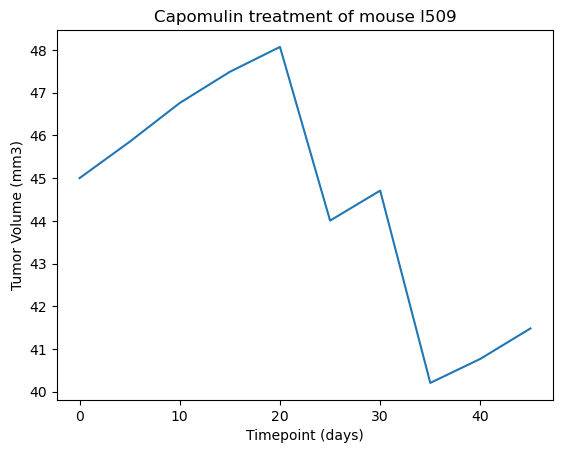

In [75]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = single_data[single_data["Drug Regimen"] == "Capomulin"]

# Select a single mouse
mouse_id = "l509"
mouse_df = capomulin_df[capomulin_df["Mouse ID"] == mouse_id]

# Generate line plot
plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])

# Add title and labels
plt.title(f"Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Display plot
plt.show()

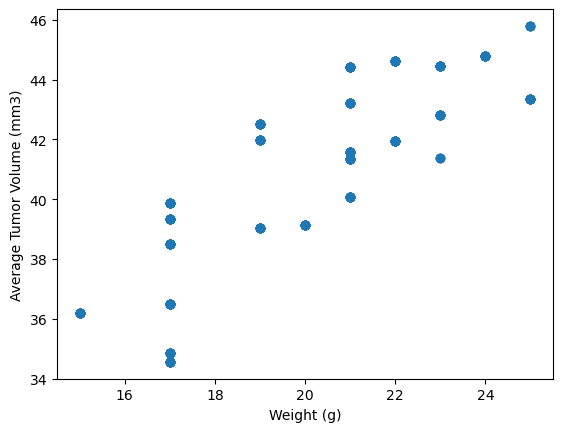

In [85]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol_df = capomulin_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)']

merged_df = pd.merge(avg_tumor_vol_df, capomulin_df[['Mouse ID', 'Weight (g)']], on='Mouse ID')

plt.scatter(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.83


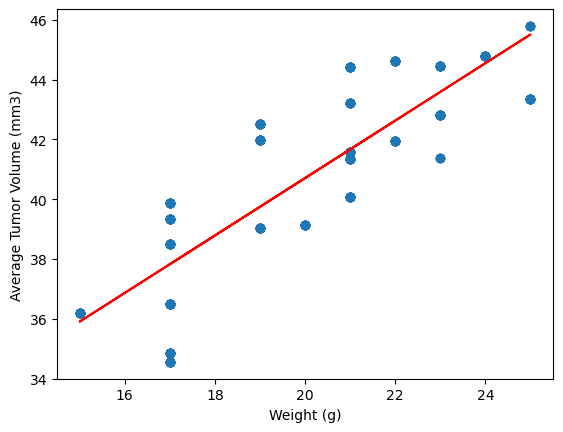

In [86]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import pearsonr, linregress

corr_coef, p_value = pearsonr(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"])

print(f"The correlation coefficient between mouse weight and average tumor volume is {corr_coef:.2f}")

slope, intercept, r_value, p_value, std_err = linregress(merged_df["Weight (g)"], merged_df["Tumor Volume (mm3)"])

plt.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"])

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

regress_values = merged_data["Weight (g)"] * slope + intercept
plt.plot(merged_data["Weight (g)"], regress_values, color="r")

plt.show()